In [46]:
from matplotlib import pyplot
import cv2
import imagehash
import os

path = '/home/strider/Code/robotron/resources/images/'
spriteDefFile = open(path+'robotronsprites.txt', 'r')
spriteClasses = open(path+'robotronclasses.txt', 'r')
spriteSheet = cv2.imread(path+"robotronsprites.jpg")
ssh, ssw, _ = spriteSheet.shape
print(ssw, ssh)
x = 0
y = 0

classes = {}
for line in spriteClasses:
    (name, classname) = line.split()
    classes[classname] = name
    
sprites = {}
spriteClasses = {}
rowheight = 0
i = 0
print("Name, Class, Width, Height, x, y")
for line in spriteDefFile:
    i += 1
    (name, c, sid, w, h, _) = line.split()
    w = int(w) * 4
    h = int(h) * 2
    if x + w > ssw:
        x = 0
        y += rowheight + 10
        rowheight = 0
    print(name, classes[c], w, h, x, y)
    sprite = spriteSheet[y:y+h, x:x+w]
    sprites[name] = sprite[:,:,::-1]
    spriteClasses[name] = c
    x += w + 10
    if h > rowheight:
        rowheight = h
        


608 512
Name, Class, Width, Height, x, y
familydeath nothing 24 22 0 0
1000 nothing 24 10 34 0
2000 nothing 24 10 68 0
3000 nothing 24 10 102 0
4000 nothing 24 10 136 0
5000 nothing 24 10 170 0
mommy1 civilian 16 28 204 0
mommy2 civilian 16 28 230 0
mommy3 civilian 16 28 256 0
mommy4 civilian 16 28 282 0
mommy5 civilian 16 28 308 0
mommy6 civilian 16 28 334 0
mommy7 civilian 16 28 360 0
mommy8 civilian 16 28 386 0
mommy9 civilian 16 28 412 0
mommy10 civilian 16 28 438 0
mommy11 civilian 16 28 464 0
mommy12 civilian 16 28 490 0
daddy1 civilian 20 26 516 0
daddy2 civilian 20 26 546 0
daddy3 civilian 20 26 576 0
daddy4 civilian 20 26 0 38
daddy5 civilian 20 26 30 38
daddy6 civilian 20 26 60 38
daddy7 civilian 20 26 90 38
daddy8 civilian 20 26 120 38
daddy9 civilian 20 26 150 38
daddy10 civilian 20 26 180 38
daddy11 civilian 20 26 210 38
daddy12 civilian 20 26 240 38
mikey1 civilian 12 22 270 38
mikey2 civilian 12 22 292 38
mikey3 civilian 12 22 314 38
mikey4 civilian 12 22 336 38
mikey5 c

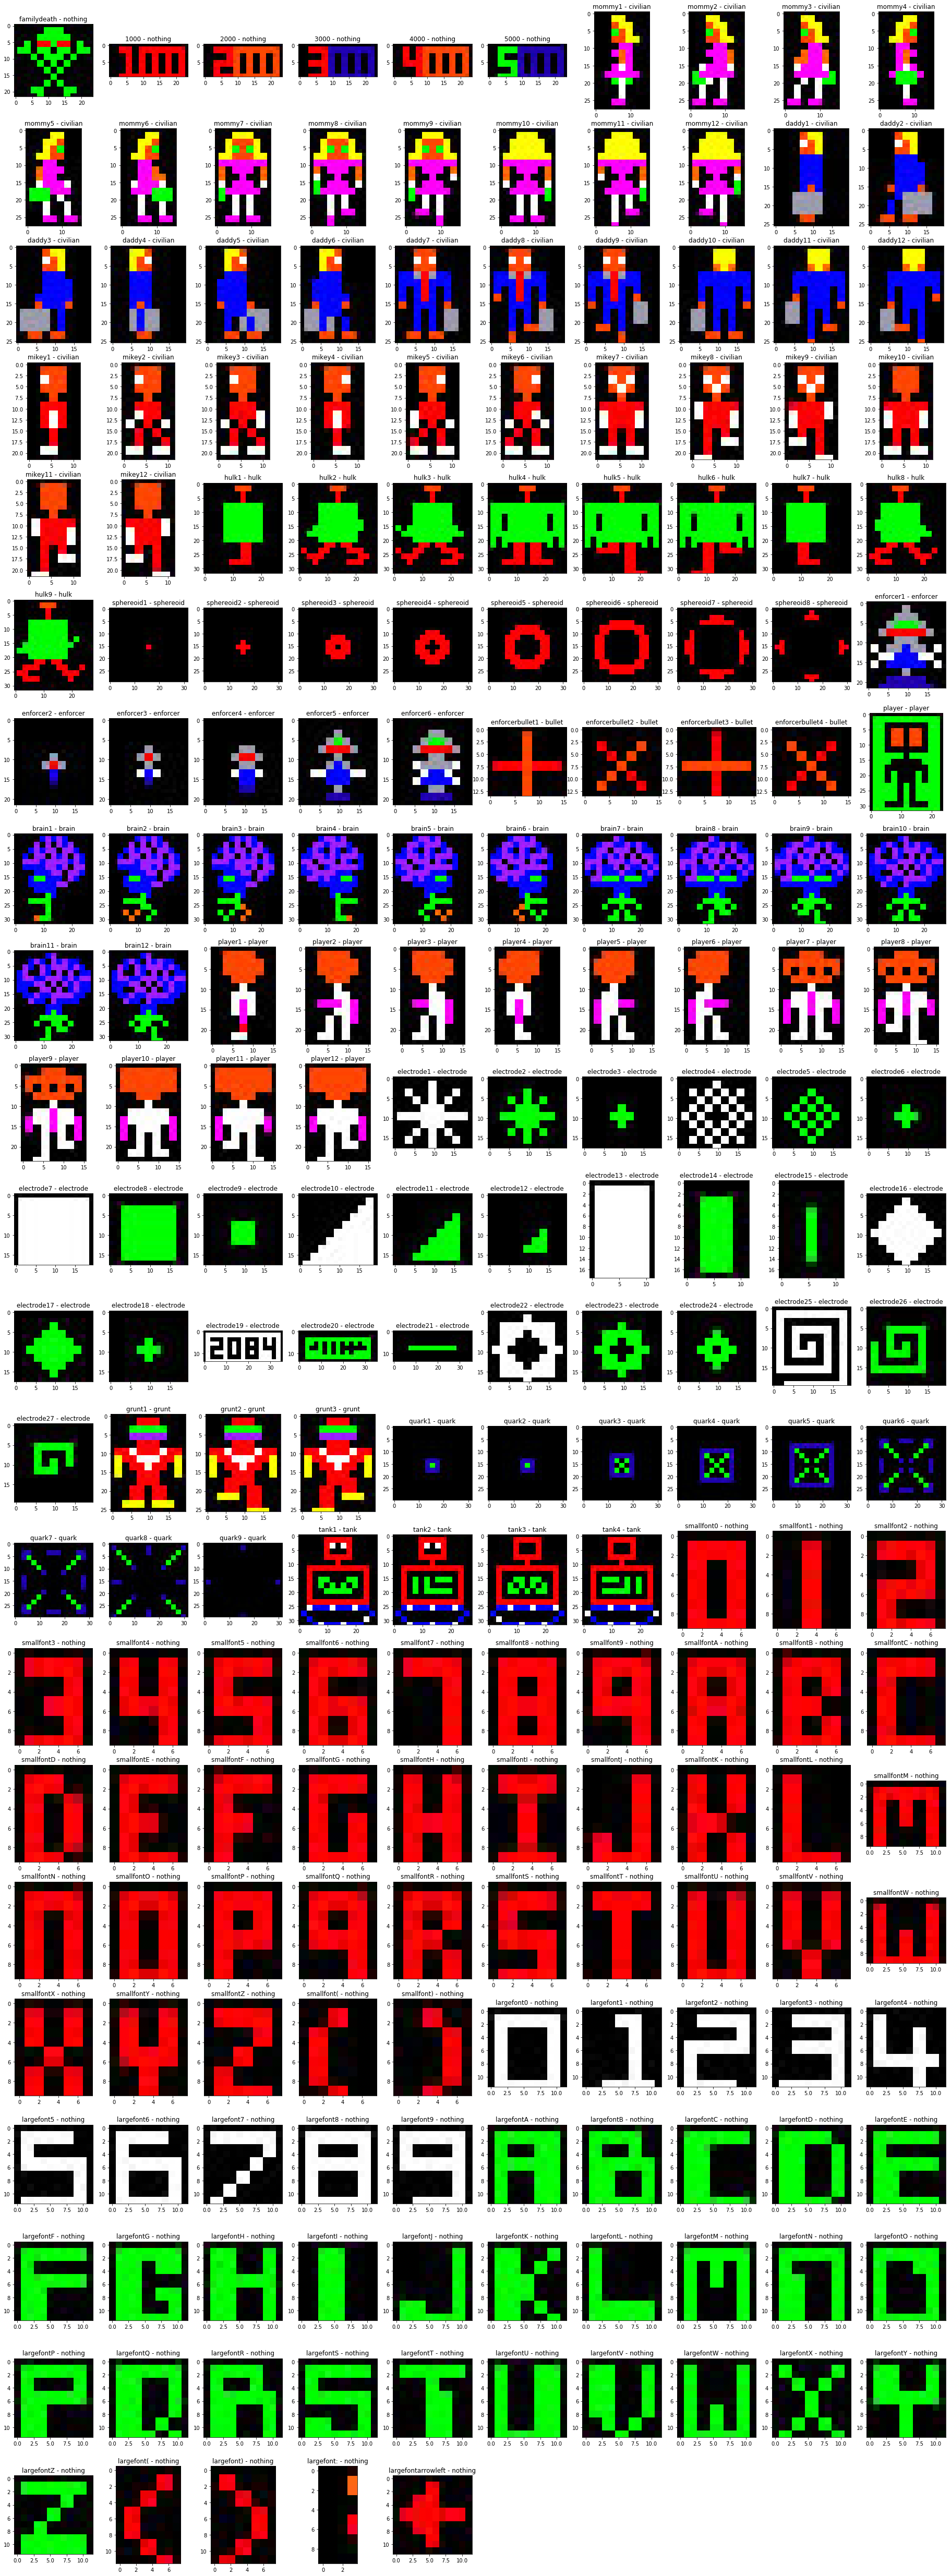

In [2]:
fig=pyplot.figure(figsize=(32, 90))
i = 0
r = 10
c = int(len(sprites) / 10) + 1

for name in sprites.keys():
    sprite = sprites[name]
    cls = classes[spriteClasses[name]]
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite)
    subplot.set_title("{} - {}".format(name, cls))